<a href="https://colab.research.google.com/github/adiban17/PyTorch-Tutorial/blob/main/03_PyTorch_ComputerVision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
print("Welcome to PyTorch Computer Vision !")

Welcome to PyTorch Computer Vision !


## 0. Computer Vision Libraries in PyTorch
* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvisionmodels`- get pretrained computer vision models that you can leverage for your own problems
* `torchvision.transform` - functions for manipulating your vision data (images) to be suitable for use in an ML model
* `torch.utils.data.Dataset` - base Dataset class for PyTorch
* `torch.utils.data.DataLoader` - Creates a Python iterable over a dataset

In [3]:
# Import PyTorch
import torch
from torch import nn

# Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Check version
print(torch.__version__)
print(torchvision.__version__)

2.9.0+cpu
0.24.0+cpu


## 1. Getting a dataset
The dataset we'll be using is FashionMNIST from torchvision.datasets

In [4]:
# Setup training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", # where to download the data to ?
    train=True, # do we want the training dataset ?
    download=True, #do we want to download yes/no ?
    transform=torchvision.transforms.ToTensor(), # how do we want to transform the data ?
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    transform=ToTensor(),
    download=True,
    target_transform=None
)

100%|██████████| 26.4M/26.4M [00:00<00:00, 115MB/s]
100%|██████████| 29.5k/29.5k [00:00<00:00, 4.01MB/s]
100%|██████████| 4.42M/4.42M [00:00<00:00, 66.9MB/s]
100%|██████████| 5.15k/5.15k [00:00<00:00, 12.0MB/s]


In [5]:
len(train_data), len(test_data)

(60000, 10000)

In [6]:
# See the first training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [7]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [8]:
class_data_idx = train_data.class_to_idx
class_data_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [9]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [13]:
# Check the shape of our data
print(f"Image Shape:{image.shape} -> (color_channels, height, width)")
print(f"Image Label: {class_names[label]}")

Image Shape:torch.Size([1, 28, 28]) -> (color_channels, height, width)
Image Label: Ankle boot


### 1.2 Visualizing our data

Image Shape:torch.Size([1, 28, 28])


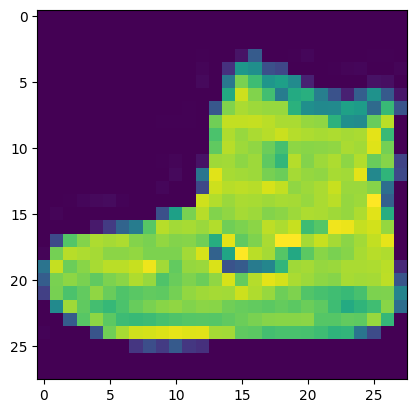

In [17]:
import matplotlib.pyplot as plt
image, label = train_data[0]
print(f"Image Shape:{image.shape}")
plt.imshow(image.squeeze());

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

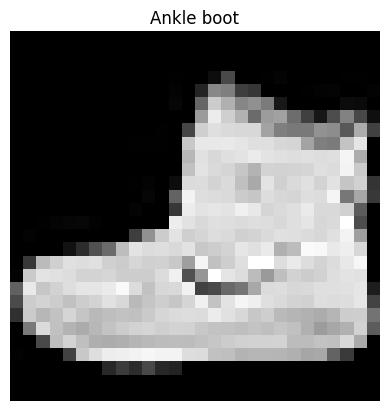

In [18]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

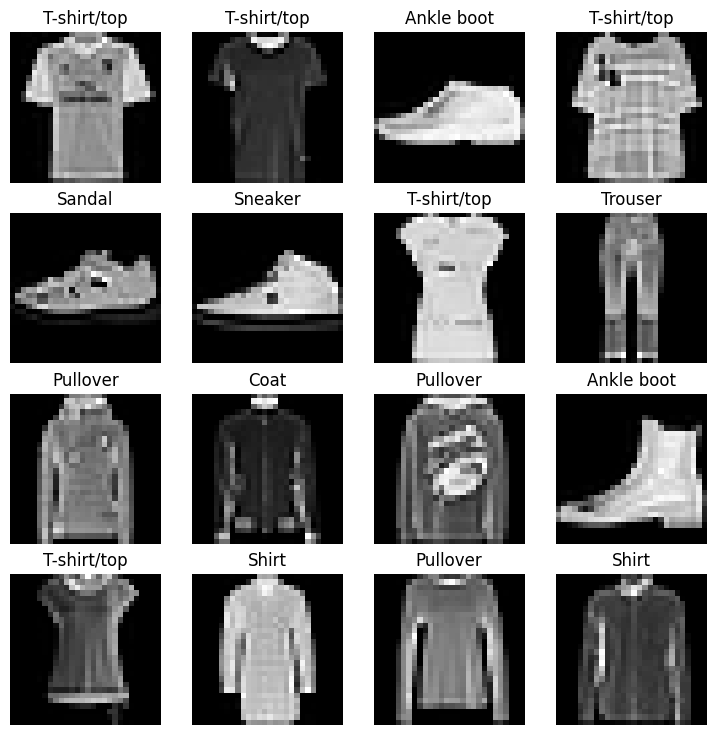

In [21]:
# Plot more images
torch.manual_seed(3)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  random_idx = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

Do you think these items of clothing (images) could be modified with pure linear lines ? Or do you think we'll need curves ?

## 2. Prepare DataLoader
Right now, our data is in the form of PyTorch Datasets.

DataLoader turns our dataset into a Python iterable.

More specifically, we want to turn our data into batches (or mini-batches).

Why would we do this ?

1. It is more computationally efficient, as in, your computing hardware may not be able to look (store in memory) at 60000 images in one hit. So we break it down to 32 images at a time (batch size of 32).
2. It gives our neural network more chances to update its gradient per epoch.

In [23]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

In [24]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7cc110610dd0>,
 <torch.utils.data.dataloader.DataLoader at 0x7cc1100e6060>)

In [26]:
# Let's check out what we have created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}..........")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}..........")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7cc110610dd0>, <torch.utils.data.dataloader.DataLoader object at 0x7cc1100e6060>)
Length of train_dataloader: 1875 batches of 32..........
Length of test_dataloader: 313 batches of 32..........


In [28]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image Size:torch.Size([1, 28, 28])
Label:1, Label Size: torch.Size([])


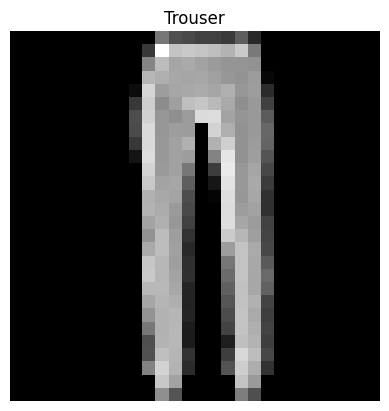

In [39]:
# Show a sample
# torch.manual_seed(23)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image Size:{img.shape}")
print(f"Label:{label}, Label Size: {label.shape}")

## 3. Model 0: Build a baseline model
When starting to build a series of machine learning modelling experiments, it's best practice to start with a baseline model.

A baseline model is a simple model you will try and improve upon with subsequent models/experiments.

In other words: start simple and add complexity when necessary.

In [41]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x)   # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape}")
print(f"Shape after flattening: {output.shape}")

Shape before flattening: torch.Size([1, 28, 28])
Shape after flattening: torch.Size([1, 784])


In [42]:
output

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.4196, 0.4314, 0.2824, 0.1922, 0.2902, 0.5020, 0.4510,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0196,
         0.0000, 0.2980, 0.8471, 0.8863, 0.8863, 1.0000, 0.8627, 0.9961, 0.8745,
         0.8824, 0.8000, 0.0667, 0.0000, 0.0157, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0118, 0.0000, 0.4157, 0.9333, 0.8078, 0.8157, 0.8275, 0.8392, 0.8353,
         0.8431, 0.8275, 0.8941, 0.1373, 0.0000, 0.0235, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0039, 0.0000, 0.5020, 0.9098, 0.8588, 0.8510, 0.8353, 0.8392,
         0.8510, 0.8392, 0.8431, 0.9020, 0.1569, 0.0000, 0.0118, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0

In [51]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
               input_shape: int,
               hidden_units: int,
               output_shape: int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=input_shape, out_features=hidden_units),
        nn.Linear(in_features=hidden_units, out_features=output_shape)
    )

  def forward(self, x):
    return self.layer_stack(x)

In [52]:
torch.manual_seed(23)

# Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, # this is 28*28
    hidden_units=10, # how many units in the hidden layer
    output_shape=len(class_names) # one for every class
).to('cpu')

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [55]:
dummy_x = torch.rand(1, 1, 28, 28)
model_0(dummy_x)

tensor([[ 0.2698, -0.0844, -0.0452,  0.1836,  0.4619,  0.1618,  0.1058, -0.1703,
          0.1569, -0.3004]], grad_fn=<AddmmBackward0>)

In [56]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[-0.0051, -0.0151, -0.0055,  ...,  0.0020, -0.0088, -0.0191],
                      [ 0.0175, -0.0093, -0.0212,  ..., -0.0182, -0.0261,  0.0094],
                      [-0.0064, -0.0023,  0.0099,  ...,  0.0048,  0.0281,  0.0120],
                      ...,
                      [-0.0161, -0.0215,  0.0322,  ...,  0.0071,  0.0350, -0.0330],
                      [ 0.0274,  0.0202,  0.0143,  ..., -0.0157,  0.0172, -0.0156],
                      [ 0.0125,  0.0272,  0.0133,  ...,  0.0314, -0.0117,  0.0179]])),
             ('layer_stack.1.bias',
              tensor([ 0.0233, -0.0116,  0.0296,  0.0294, -0.0326, -0.0042,  0.0303,  0.0314,
                       0.0273,  0.0335])),
             ('layer_stack.2.weight',
              tensor([[-0.2450, -0.1207, -0.2224, -0.2144, -0.2378, -0.1567, -0.2785,  0.1425,
                       -0.0761, -0.2001],
                      [ 0.1041,  0.1662,  0.1567, -0.0025,  0.0542, -0.0256, -0.

### 3.1 Setting up our loss function, optimizer and evaluation metrics
* Loss Function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`
* Optimizer - our optimizer `torch.optim.SGD()` (stochastic gradient descent)
* Evaluation Metric - since we're working on a classification problem, let's use accuracy as our evaluation metric

In [57]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo
if Path("helper_function.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_function.py", "wb") as f:
    f.write(request.content)

In [58]:
# Importing accuracy metric
from helper_function import accuracy_fn

# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

### 3.2 Creating a function to time our experiments
Machine Learning is very experimental.

Two of the main things you'll often want to track are:
1. Model's performance (loss and accuracy function values etc...)
2. How fast it runs

In [68]:
from timeit import default_timer as timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device=None):
  '''Prints difference between start ad end time'''
  total_time = end-start
  print(f"Training Time is {device}:{total_time:.5f} seconds")
  return total_time

In [69]:
start_time = timer()
# some code ...
end_time = timer()
print_train_time(start_time, end_time, device="cpu")

Training Time is cpu:0.00004 seconds


3.553099941200344e-05